## With DQN replay memory (SGD optimizer)

In [1]:
import gym
from environment import Environment
from agent import Agent
from trainer import Final_variational_trainer, Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
ENV_NAME = 'MountainCar-v0' #'CartPole-v1' #'FrozenLake-v0' #
env = gym.make(ENV_NAME)

**PLUS KL!!**

``loss_Q_var = torch.sum(0.5 * self.agent.PREC *  torch.pow(Q_var_pred_tf - sum_future_rewards_tf, 2) 
                       + 0.5 / self.agent.BETA * torch.pow(Q_var_pred_tf + loss_KL_tf_list.view((current_batch_size, 1) - Q_var_pred_tf.detach())
                                                  )``

**LAMBDA = 1 !!**

In [3]:
BETA = 50
GAMMA=1
OBS_LEAK = 1e-6 #1e-3
PREC = 2e-4 #0.03 # LAMBDA # regularizer
Q_VAR_MULT = 10
ALPHA = 1e-3 / Q_VAR_MULT #3e-3
augmentation = True
do_reward = True
final = True

In [4]:
N = 1000

In [5]:
offPolicy = False
monte_carlo=True
isTime=False

In [7]:
import time
import os

data_path = '200703-MountainCar-final-with-reward-DQN.npy'
BETA_range = [5,10,15,20,25,30,35,40,45,50]
PREC_range = [1e-4, 2e-4, 3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4, 1e-3]

if not os.path.isfile(data_path):
    mem_obs_final = {}
    mem_total_reward = {}

    tic = time.clock()
    for BETA in BETA_range:
        mem_obs_final[BETA] = {}
        mem_total_reward[BETA] = {}

        for PREC in PREC_range:
            print("BETA=", BETA, ", PREC=", PREC)
            toc = time.clock()
            print("Elapsed time:", toc - tic)

            agent = Agent(env,
                  ALPHA=ALPHA,
                  GAMMA=GAMMA, 
                  BETA=BETA, 
                  PREC=PREC,
                  do_reward=do_reward,
                  Q_VAR_MULT=Q_VAR_MULT,
                  isTime=isTime,    #!! TimeAgent
                  offPolicy=offPolicy) 
            trainer = Final_variational_trainer(agent, 
                                            monte_carlo=monte_carlo, 
                                            augmentation=augmentation,
                                            final=final,
                                            OBS_LEAK=OBS_LEAK,
                                            ref_prob='unif',
                                            HIST_HORIZON = 200 * int(1/OBS_LEAK))
            for i in range(N):
                #print(i)
                trainer.run_episode()
                if (i+1)%1000 ==0:
                    #plt.figure(figsize = (4, 4))
                    #plt.plot(agent.KL.flatten())
                    print(trainer.nb_trials)
                    #print("Trajectory: ", trainer.trajectory)
                    print("Total reward got: %.4f" % trainer.total_reward)

            mem_obs_final[BETA][PREC] = trainer.mem_obs_final
            mem_total_reward[BETA][PREC] = trainer.mem_total_reward

    data = np.array((mem_obs_final, mem_total_reward))
    np.save(data_path, data)
else:
    data = np.load(data_path)
    mem_obs_final = data[0]
    mem_total_reward = data[1]


        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


BETA= 5 , PREC= 0.0001
Elapsed time: 0.0003279999999996619
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.0002
Elapsed time: 533.661132
1000
Total reward got: -118.0000
BETA= 5 , PREC= 0.0003
Elapsed time: 1102.88418
1000
Total reward got: -135.0000
BETA= 5 , PREC= 0.0004
Elapsed time: 1692.285408
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.0005
Elapsed time: 2296.852628
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.0006
Elapsed time: 2918.4080010000002
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.0007
Elapsed time: 3537.0462420000003
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.0008
Elapsed time: 4149.114968
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.0009
Elapsed time: 4780.870701
1000
Total reward got: -200.0000
BETA= 5 , PREC= 0.001
Elapsed time: 5402.010665
1000
Total reward got: -200.0000
BETA= 10 , PREC= 0.0001
Elapsed time: 5987.659528
1000
Total reward got: -200.0000
BETA= 10 , PREC= 0.0002
Elapsed time: 6609.085447
1000
Total reward got: -20

1000
Total reward got: -200.0000
BETA= 50 , PREC= 0.0009
Elapsed time: 60658.619308
1000
Total reward got: -200.0000
BETA= 50 , PREC= 0.001
Elapsed time: 61301.598667
1000
Total reward got: -200.0000


In [17]:
mean_obs = np.zeros((len(BETA_range), len(PREC_range)))
mean_reward = np.zeros((len(BETA_range), len(PREC_range)))

for i, BETA in enumerate(BETA_range):
    for j, PREC in enumerate(PREC_range):
        mean_obs[i,j] = np.mean(mem_obs_final[BETA][PREC])
        mean_reward[i,j] = np.mean(mem_total_reward[BETA][PREC])
    
        

Text(0.5, 1.0, 'Mean final obs')

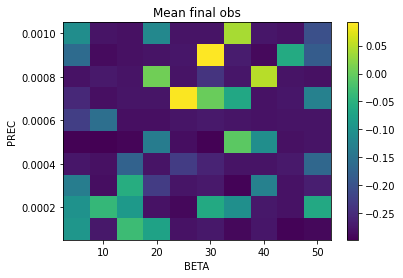

In [30]:
#plt.imshow(mean_obs)
im = plt.imshow(mean_obs.T, 
              origin='lower', 
              extent=[min(BETA_range)-2.5, max(BETA_range)+2.5,
                      min(PREC_range)-5e-5, max(PREC_range)+5e-5],
              aspect = 'auto',
              alpha=1)
plt.colorbar(im)
plt.xlabel('BETA')
plt.ylabel('PREC')
plt.title('Mean final obs')


In [27]:
np.mean(mem_obs_final[25][0.0007])

0.08871280128542544

Text(0.5, 1.0, 'Mean reward')

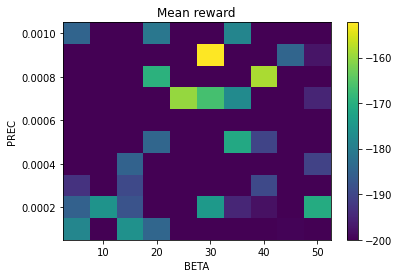

In [31]:
im = plt.imshow(mean_reward.T, 
              origin='lower', 
              extent=[min(BETA_range)-2.5, max(BETA_range)+2.5,
                      min(PREC_range)-5e-5, max(PREC_range)+5e-5],
              aspect = 'auto',
              alpha=1)
plt.colorbar(im)
plt.xlabel('BETA')
plt.ylabel('PREC')
plt.title('Mean reward')

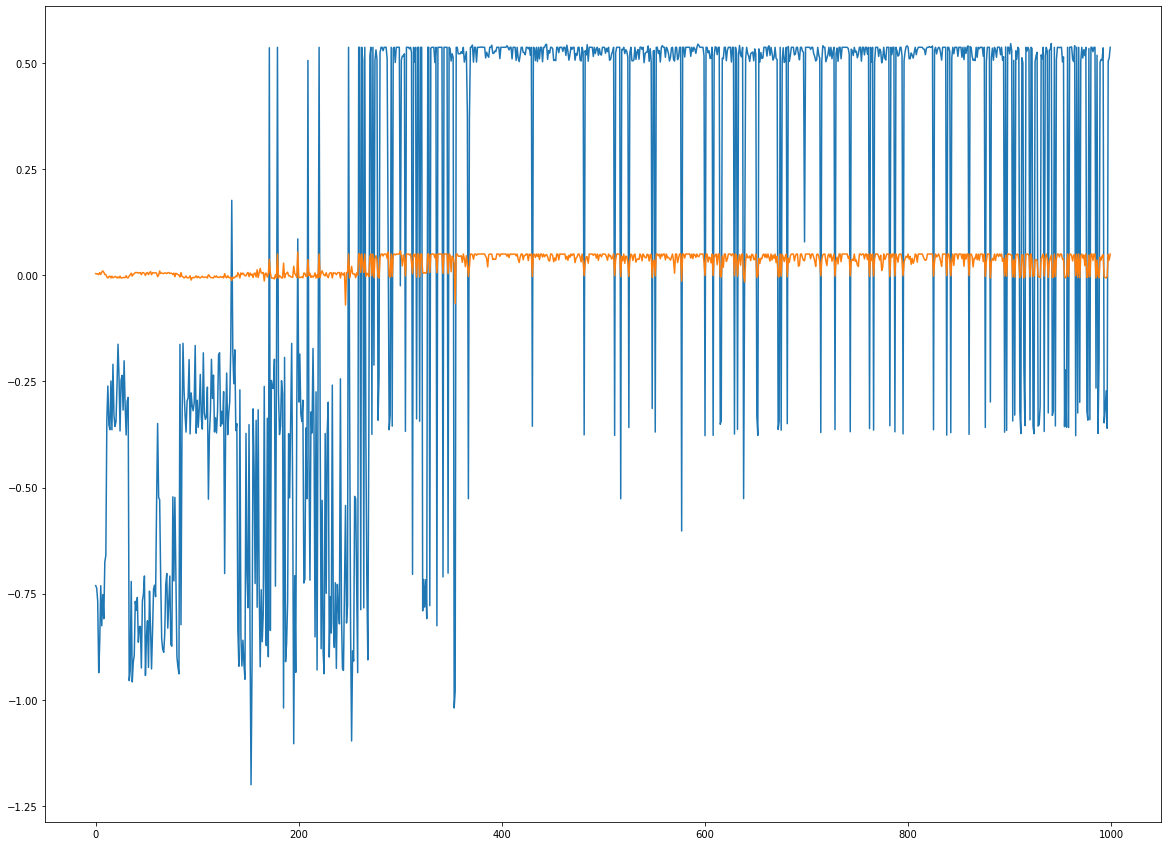

In [29]:


BETA = 30
PREC = 0.0009
plt.figure(figsize=(20,15))
plt.plot(np.array(mem_obs_final[BETA][PREC])[:,:2])

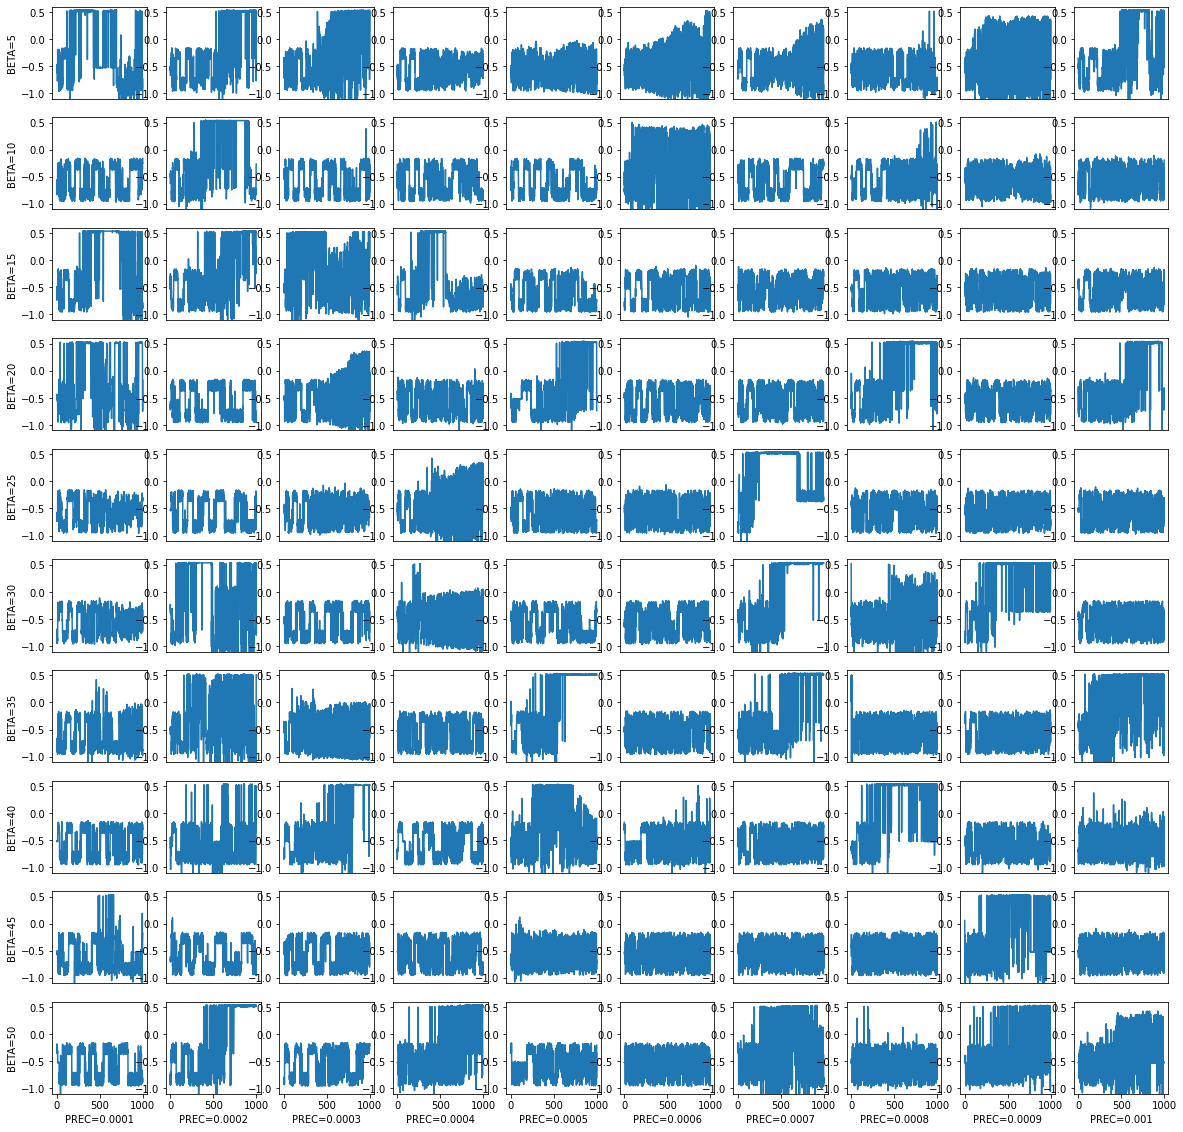

In [43]:
plt.figure(figsize = (20,20))
for i, BETA in enumerate(BETA_range):
    for j, PREC in enumerate(PREC_range):
        plt.subplot(10,10,i*10+j+1)
        plt.plot(np.array(mem_obs_final[BETA][PREC])[:,0])
        if i < 9:
            plt.xticks([])
        else:
            plt.xlabel('PREC='+str(PREC))
        plt.ylim([-1.1,0.6])
        if j > 0:
            plt.yticks()
        else:
            plt.ylabel('BETA='+str(BETA))

In [ ]:
obs = agent.get_observation()
obs

In [ ]:
trainer.final

In [ ]:
np.concatenate((obs, agent.one_hot(1)))

In [ ]:
agent.Q_KL(obs,0, tf=True)

In [ ]:
agent.softmax_choice([-0.5, 0])

In [ ]:
m = (agent.env.observation_space.high + agent.env.observation_space.low) / 2
m

In [ ]:
agent.env.observation_space.high

In [ ]:
trainer.final

In [ ]:
from scipy.stats import multivariate_normal
test = np.array(trainer.mem_obs_final).T
mu = np.mean(test, axis = 1)
Sigma = np.cov(np.array(trainer.mem_obs_final).T)
rv = multivariate_normal(mu, Sigma)

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(np.array(trainer.mem_obs_final)[:,:2])

In [ ]:
trainer.action_history

In [ ]:
trainer.agent.softmax(trainer.agent.get_observation())

In [ ]:
obs = (-0.5,0) #trainer.agent.get_observation()

In [ ]:
trainer.agent.set_Q_obs(obs, Q = agent.Q_KL)

In [ ]:
trainer.agent.set_Q_obs(obs, Q = agent.Q_var)

In [ ]:
trainer.Q_learning

In [ ]:
%matplotlib inline
import time
import seaborn
seaborn.set()
axe = np.arange(-100,100)/100


p_ref = 1 / np.prod(agent.env.observation_space.high - agent.env.observation_space.low)

f={}
KL={}
pred_KL={}
pred_reward={}
pred_var={}
act = {}
for v in [-0.01, 0.0, 0.01]:
    f[v] = np.zeros(200)
    KL[v] = np.zeros(200)
    pred_KL[v] = np.zeros(200)
    pred_reward[v] = np.zeros(200)
    pred_var[v] = np.zeros(200)
    act[v] = [np.zeros(200), np.zeros(200), np.zeros(200)]

for i in range(200):
    for v in [-0.01, 0.0, 0.01]:
        obs = (axe[i], v)
        tic_1 = time.clock()
        f[v][i] = rv.pdf(obs)
        tic_2 = time.clock()
        KL[v][i] = np.log(f[v][i]) - np.log(p_ref)
        tic_3 = time.clock()
        #pred_KL[i] = trainer.calc_sum_future_KL(obs, obs, done=False)
        sum_future_KL = trainer.KL(obs, done=False)
        tic_3_1 = time.clock()
        next_values = agent.set_Q_obs(obs, Q=agent.Q_KL)
        tic_3_2 = time.clock()
        next_sum = agent.softmax_expectation(obs, next_values)
        tic_3_3 = time.clock()
        pred_KL[v][i] += agent.GAMMA * next_sum
        
        tic_4 = time.clock()   
        pred_reward[v][i] = trainer.calc_sum_future_rewards(0, obs, done=False)
        tic_5 = time.clock()   
        pred_var[v][i] = trainer.agent.softmax_expectation(obs, trainer.agent.set_Q_obs(obs))
        tic_6 = time.clock()   
        if i ==0:
            print('rv.pdf(obs)',
                 (tic_2-tic_1)*1000)
            print('np.log(f[i]) - np.log(p_ref)',
                  (tic_3-tic_2)*1000)
            print('trainer.calc_sum_future_KL(obs, obs, done=False)',
                  (tic_4-tic_3)*1000)
            print('sum_future_KL = trainer.KL(obs, done=False)',
                  (tic_3_1-tic_3)*1000)
            print('next_values = agent.set_Q_obs(obs, Q=agent.Q_KL)',
                  (tic_3_2-tic_3_1)*1000)
            print('next_sum = agent.softmax_expectation(obs, next_values)',
                  (tic_3_3-tic_3_2)*1000)
            print('trainer.calc_sum_future_rewards(0, obs, done=False)',
                  (tic_5-tic_4)*1000)
            print('trainer.agent.softmax_expectation(obs, trainer.agent.set_Q_obs(obs))',
                  (tic_6-tic_5)*1000)
        act[v][0][i] = trainer.agent.Q_var(obs,0)
        act[v][1][i] = trainer.agent.Q_var(obs,1)
        act[v][2][i] = trainer.agent.Q_var(obs,2)
for v in [-0.01, 0.0, 0.01]:
    plt.plot(axe, f[v], label=v)
plt.plot((-1, 1), (p_ref, p_ref))
plt.plot([-0.5, -0.5],[0, 400],'r--')
plt.legend()
#plt.title()
plt.figure()
for v in [-0.01, 0.0, 0.01]:
    plt.plot(axe, KL[v], label='instant KL ('+str(v)+')')
plt.plot((-1, 1), (0, 0))
plt.plot([-0.5, -0.5],[-400, 400],'r--')
plt.ylim((-10,10))
plt.legend()
plt.figure()
for v in [-0.01, 0.0, 0.01]:
    plt.plot(axe, pred_KL[v], label='sum future KL ('+str(v)+')')
plt.plot([-0.5, -0.5],[-400, 400],'r--')
plt.ylim((-10,10))
#plt.ylim([-1, 5])
plt.legend()
plt.figure()
for v in [-0.01, 0.0, 0.01]:
    plt.plot(axe, pred_reward[v], label='sum future rewards ('+str(v)+')')
    plt.plot(axe, pred_var[v], label='softmax value ('+str(v)+')')
plt.plot([-0.5, -0.5],[-1, 1],'r--')
plt.legend()
plt.figure()
plt.plot(axe, act[-0.01][0], label='act 0')
plt.plot(axe, act[-0.01][1], label='act 1')
plt.plot(axe, act[-0.01][2], label='act 2')
plt.plot([-0.5, -0.5],[-1, 1],'r--')
plt.title(-0.01)
plt.legend()
plt.figure()
plt.plot(axe, act[0.0][0], label='act 0')
plt.plot(axe, act[0.0][1], label='act 1')
plt.plot(axe, act[0.0][2], label='act 2')
plt.plot([-0.5, -0.5],[-1, 1],'r--')
plt.title(0.0)
plt.legend()
plt.figure()
plt.plot(axe, act[0.01][0], label='act 0')
plt.plot(axe, act[0.01][1], label='act 1')
plt.plot(axe, act[0.01][2], label='act 2')
plt.plot([-0.5, -0.5],[-1, 1],'r--')
plt.title(0.01)
plt.legend()

In [ ]:
%matplotlib inline
plt.plot(trainer.mem_total_reward)

In [ ]:
%matplotlib tk
agent.env=env
trainer.run_episode(render=True)
plt.plot(trainer.trajectory)

In [ ]:
trainer.action_history

In [ ]:
%matplotlib inline
data_obs = np.array(trainer.mem_obs)
r = len(trainer.mem_obs) // 20
plt.figure(figsize=(20,15))
for inter in range(20):
    b_min = r *inter
    b_max = b_min + r
    mu = np.mean(data_obs[b_min:b_max,:].T, axis = 1)
    Sigma = np.cov(data_obs[b_min:b_max,:].T)
    rv = multivariate_normal(mu, Sigma)
    axe_0 = np.linspace(-1.3, 0.5, 101)
    axe_1 = np.linspace(-0.1, 0.1, 101)
    proba = np.zeros((101, 101))
    for i, x in enumerate(axe_0):
        for j, y in enumerate(axe_1):
            obs = (x, y)
            proba[i,j] = rv.pdf(obs)
    ax = plt.subplot(5,4,inter+1)
    ax.imshow(proba.T, 
              origin='lower', 
              extent=[-1.3,
                       0.5, 
                       -0.1,
                       0.1],
              aspect = 'auto')
    #plt.colorbar()
    #ax = plt.subplot(5,4,inter+2)
    ax.plot(data_obs[b_min:b_max,0], data_obs[b_min:b_max,1], '.r', markersize= 1, alpha = .1)
    plt.xlim((-1.3,0.5))
    plt.ylim((-0.1,0.1))
    

In [ ]:
np.array(1).ndim

In [ ]:
int(1/0.1)

In [ ]:
np.mean(trainer.mem_obs[-1000:], axis = 0)